In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

experiment_id = "2xXMPaMlQxGFEb4pMLOTMw" # full 


experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

print(df["run"].unique())
print(df["tag"].unique())




['intra/version_42' 'intra/version_43' 'intra/version_44'
 'intra/version_45' 'intra/version_46' 'intra/version_47'
 'intra/version_48' 'intra/version_49' 'intra/version_50'
 'intra/version_51' 'llm_spdesc/bloomz/meld/lightning_logs/version_0'
 'llm_spdesc/bloomz/meld/lightning_logs/version_1'
 'llm_spdesc/bloomz/meld/lightning_logs/version_2'
 'llm_spdesc/bloomz/meld/lightning_logs/version_3'
 'llm_spdesc/bloomz/meld/lightning_logs/version_4'
 'llm_spdesc/bloomz/meld/lightning_logs/version_5'
 'llm_spdesc/bloomz/meld/lightning_logs/version_6'
 'llm_spdesc/bloomz/meld/lightning_logs/version_7'
 'llm_spdesc/bloomz/meld/lightning_logs/version_8'
 'llm_spdesc/bloomz/meld/lightning_logs/version_9'
 'llm_spdesc/intra/lightning_logs/version_42'
 'llm_spdesc/intra/lightning_logs/version_43'
 'llm_spdesc/intra/lightning_logs/version_44'
 'llm_spdesc/intra/lightning_logs/version_45'
 'llm_spdesc/intra/lightning_logs/version_46'
 'llm_spdesc/intra/lightning_logs/version_47'
 'llm_spdesc/intra/li

In [2]:

# dfw_org = experiment.get_scalars(pivot=True) 
# dfw_org = dfw_org[dfw_org.run.str.contains("/")]


In [3]:
dfw_org = experiment.get_scalars(pivot=False) 


In [4]:
len(dfw_org)

170280

In [5]:
filter_settings= ['llm_spdesc/llama70/lightning_logs', 'llm_spdesc_attn/lightning_logs','llm_spdesc/intra/lightning_logs']
setting_names = ['Bios ERC (MLP)',   'Bios ERC (attention)', 'Intra+inter ERC (baseline)']
filter_settings_title_map= dict(zip(filter_settings, setting_names))

def check_run(x):
    checking = False
    for setting_accepted in filter_settings:
        if setting_accepted in x['run']:
            checking = True
            break
    x['select'] = checking
    return x

dfw_select = dfw_org.apply(check_run, axis=1) 
dfw_select = dfw_select[dfw_select['select'] == True]
# dfw_org = df[df['run'].str.contains("ball") or df['run'].str.contains("ball") or df['run'].str.contains("ball")]

In [6]:
len(dfw_select)

46440

In [7]:
dfw = dfw_select.pivot(index=['run', 'step'], columns='tag' )
dfw = dfw.query('step >= 600').query('step <= 8000')

In [8]:

# Filter the DataFrame to only validation data, which is what the subsequent
# analyses and visualization will be focused on.
dfw_validation = dfw 

# Get the optimizer value for each row of the validation DataFrame.
# optimizer_validation = ["+".join(e[0].split('/')[:-2]) for e in dfw.index.values]
def col_name_to_setting_name(e):
    return filter_settings_title_map["/".join(e[0].split('/')[:-1])]
optimizer_validation = [col_name_to_setting_name(e) for e in dfw.index.values]



In [9]:
sns.set(font_scale=1.5, rc={'text.usetex' : True})


In [10]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
sns.lineplot(data=dfw_validation, x="step", y=('value', "valid/loss"),markers=True, dashes=False,  style=optimizer_validation,
             hue=optimizer_validation).set_title("valid/loss")
plt.subplot(1, 2, 2)
sns.lineplot(data=dfw_validation, x="step", y=('value',"valid/f1"),markers=True,  dashes=False ,style=optimizer_validation,
             hue=optimizer_validation).set_title("valid/f1")
plt.tight_layout()

plt.savefig('learning_cuver_dev.pdf')

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x7f2d6aa8b4c0> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 900x300 with 2 Axes>

In [11]:
pip list | grep tensor

tensorboard                   2.12.0
tensorboard-data-server       0.7.0
tensorboard-plugin-wit        1.8.1
tensorboardX                  2.6
Note: you may need to restart the kernel to use updated packages.


In [14]:
stats_v = {}
df_data = {'sent_aggregate_method': [], 'hp_metric': []}
for setting_name in setting_names:
    stats_v[setting_name] = []
    columns = set([c_name[0] for c_name in dfw_validation.index.values if setting_name in str(col_name_to_setting_name(c_name))])
    for col in columns:
        print(col)
        max_v = max([e for e in dfw_validation.query(f'run == "{col}"') [('value',"valid/f1")].values if str(e) != 'nan'])
        stats_v[setting_name].append(max_v)
        
        df_data['sent_aggregate_method'].append(setting_name)
        df_data['hp_metric'].append(max_v)
        
df = pd.DataFrame(data=df_data)


llm_spdesc/llama70/lightning_logs/version_10
llm_spdesc/llama70/lightning_logs/version_16
llm_spdesc/llama70/lightning_logs/version_17
llm_spdesc/llama70/lightning_logs/version_19
llm_spdesc/llama70/lightning_logs/version_12
llm_spdesc/llama70/lightning_logs/version_11
llm_spdesc/llama70/lightning_logs/version_15
llm_spdesc/llama70/lightning_logs/version_18
llm_spdesc/llama70/lightning_logs/version_14
llm_spdesc/llama70/lightning_logs/version_13
llm_spdesc_attn/lightning_logs/version_9
llm_spdesc_attn/lightning_logs/version_0
llm_spdesc_attn/lightning_logs/version_1
llm_spdesc_attn/lightning_logs/version_6
llm_spdesc_attn/lightning_logs/version_8
llm_spdesc_attn/lightning_logs/version_2
llm_spdesc_attn/lightning_logs/version_5
llm_spdesc_attn/lightning_logs/version_4
llm_spdesc_attn/lightning_logs/version_3
llm_spdesc_attn/lightning_logs/version_7
llm_spdesc/intra/lightning_logs/version_48
llm_spdesc/intra/lightning_logs/version_47
llm_spdesc/intra/lightning_logs/version_51
llm_spdesc/

In [23]:
stats_v

{'Bios ERC (attn.)': [65.75276947021484,
  64.9806137084961,
  66.28284454345703,
  66.57936096191406,
  65.9951171875,
  66.41258239746094,
  65.477294921875,
  66.19438171386719,
  65.24175262451172,
  66.33110046386719],
 'Bios ERC': [65.56006622314453,
  65.86911010742188,
  66.75340270996094,
  66.41223907470703,
  66.61051177978516,
  65.24260711669922,
  67.08365631103516,
  65.31583404541016,
  66.20723724365234,
  66.87550354003906],
 'Baseline': [65.41764831542969,
  66.02899169921875,
  65.17237091064453,
  64.84358215332031,
  65.61661529541016,
  65.47251892089844,
  65.1589126586914,
  65.74119567871094,
  65.93344116210938,
  64.47237396240234]}

In [22]:
stats_v  ={'Bios ERC (attn.)': stats_v['Bios ERC (attention)'], 
           'Bios ERC': stats_v['Bios ERC (MLP)'], 
           'Baseline': stats_v['Intra+inter ERC (baseline)']}

KeyError: 'Bios ERC (attention)'

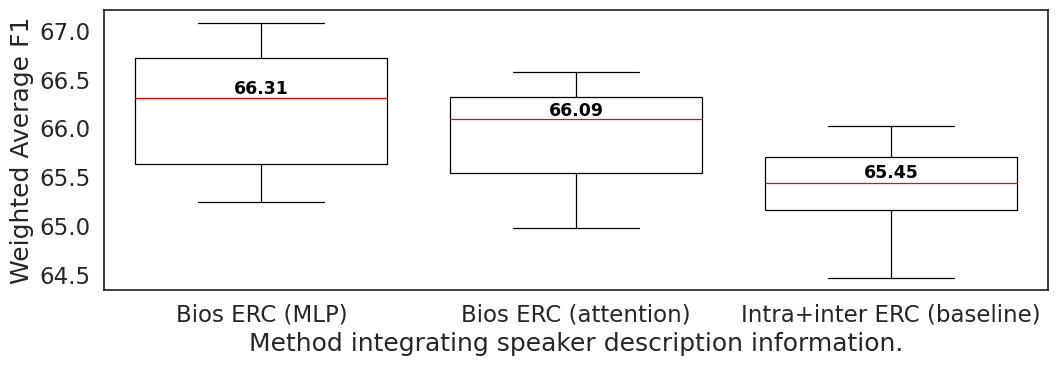

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot
import pandas as pd 

all_data = pd.read_csv('hparams_table_w4.csv')
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
}


sns.set(font_scale=1.5)
sns.set_style("white")

fig, ax = pyplot.subplots(figsize=(11, 4))
 
selected_data = df


medians =  selected_data.groupby(['sent_aggregate_method'])['hp_metric'].median().round(2)
vertical_offset = selected_data['hp_metric'].median() * 0.003  # offset from median for display

ax = sns.boxplot(x="sent_aggregate_method", y="hp_metric", # hue="accumulate_grad_batches",
                 data=selected_data,  
                 ax=ax,
            showfliers=False,
            linewidth=0.9, 
            **PROPS)
ax.set_xlabel('Method integrating speaker description information.')
ax.set_ylabel('Weighted Average F1')
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + 0.04, medians[xtick],
            horizontalalignment='center',size='x-small',color='black', weight='semibold')

plt.tight_layout()
plt.savefig('method_ablation_boxplot.pdf')

In [45]:
filter_settings_title_map['llm_spdesc/llama7'] = 'Llama-7b'

In [72]:
filter_settings= ['llm_spdesc/llama70/lightning_logs', 'llm_spdesc/llama7/', 'llm_spdesc/vicuna_33', 'llm_spdesc/intra/lightning_logs']
setting_names = ['LLama-2-70b',"Llama-7b",   'Vicuna', 'Baseline']
filter_settings_title_map= dict(zip(filter_settings, setting_names))
filter_settings_title_map['llm_spdesc/llama7'] = 'Llama-7b'


def check_run(x):
    checking = False
    for setting_accepted in filter_settings:
        if setting_accepted in x['run']:
            checking = True
            break
    x['select'] = checking
    return x

dfw_select = dfw_org.apply(check_run, axis=1) 
dfw_select = dfw_select[dfw_select['select'] == True]
dfw = dfw_select.pivot(index=['run', 'step'], columns='tag' )
dfw = dfw.query('step >= 600').query('step <= 8000')
# Filter the DataFrame to only validation data, which is what the subsequent
# analyses and visualization will be focused on.
dfw_validation = dfw 

# Get the optimizer value for each row of the validation DataFrame.
# optimizer_validation = ["+".join(e[0].split('/')[:-2]) for e in dfw.index.values]
def col_name_to_setting_name(e):
    end_tok = ""
    if e[0].endswith('/'):
        end_tok = "/"
    return filter_settings_title_map["/".join(e[0].split('/')[:-1])+end_tok]
optimizer_validation = [col_name_to_setting_name(e) for e in dfw.index.values]

stats_v = {}
df_data = {'sent_aggregate_method': [], 'hp_metric': []}
for setting_name in setting_names:
    stats_v[setting_name] = []
    columns = set([c_name[0] for c_name in dfw_validation.index.values if setting_name in str(col_name_to_setting_name(c_name))])
    for col in columns:
        print(col)
        max_v = max([e for e in dfw_validation.query(f'run == "{col}"') [('value',"valid/f1")].values if str(e) != 'nan'])
        stats_v[setting_name].append(max_v)
        
        df_data['sent_aggregate_method'].append(setting_name)
        df_data['hp_metric'].append(max_v)
        
df = pd.DataFrame(data=df_data)



llm_spdesc/llama70/lightning_logs/version_10
llm_spdesc/llama70/lightning_logs/version_16
llm_spdesc/llama70/lightning_logs/version_17
llm_spdesc/llama70/lightning_logs/version_19
llm_spdesc/llama70/lightning_logs/version_12
llm_spdesc/llama70/lightning_logs/version_11
llm_spdesc/llama70/lightning_logs/version_15
llm_spdesc/llama70/lightning_logs/version_18
llm_spdesc/llama70/lightning_logs/version_14
llm_spdesc/llama70/lightning_logs/version_13
llm_spdesc/llama7/version_36
llm_spdesc/llama7/version_34
llm_spdesc/llama7/version_1
llm_spdesc/llama7/version_19
llm_spdesc/llama7/version_13
llm_spdesc/llama7/version_30
llm_spdesc/llama7/version_8
llm_spdesc/llama7/version_3
llm_spdesc/llama7/version_25
llm_spdesc/llama7/version_38
llm_spdesc/vicuna_33/version_32
llm_spdesc/vicuna_33/version_0
llm_spdesc/vicuna_33/version_37
llm_spdesc/vicuna_33/version_27
llm_spdesc/vicuna_33/version_2
llm_spdesc/vicuna_33/version_20
llm_spdesc/vicuna_33/version_7
llm_spdesc/vicuna_33/version_39
llm_spdesc

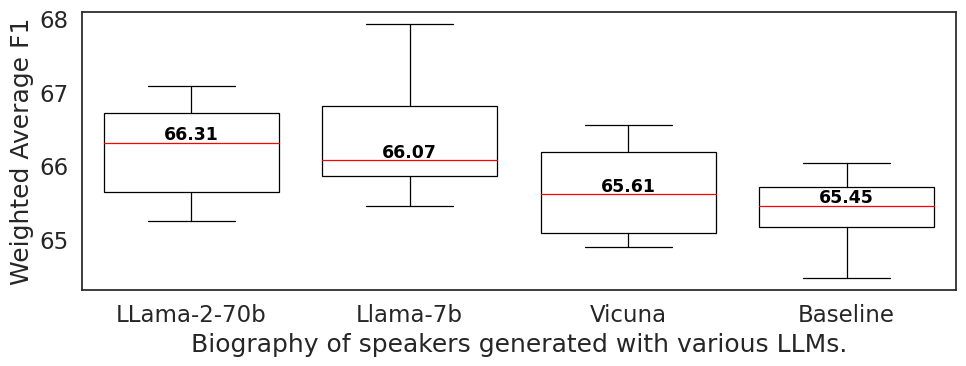

In [78]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot
import pandas as pd 

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
}


sns.set(font_scale=1.5)
sns.set_style("white")

fig, ax = pyplot.subplots(figsize=(10, 4))
 
selected_data = df


medians =  selected_data.groupby(['sent_aggregate_method'])['hp_metric'].median().round(2)
vertical_offset = selected_data['hp_metric'].median() * 0.003  # offset from median for display
medians = dict(medians)

ax = sns.boxplot(x="sent_aggregate_method", y="hp_metric", # hue="accumulate_grad_batches",
                 data=selected_data,  
                 ax=ax,
            showfliers=False,
            linewidth=0.9, 
            **PROPS)
ax.set_xlabel('Biography of speakers generated with various LLMs.')
ax.set_ylabel('Weighted Average F1')


for icol,  xtick in enumerate(ax.get_xticklabels()):
    ax.text(icol, medians[str(xtick._text)] + 0.04, medians[str(xtick._text)],
            horizontalalignment='center',size='x-small',color='black', weight='semibold')

plt.tight_layout()
plt.savefig('method_ablation_llm.pdf')

In [79]:
filter_settings= ['llm_spdesc/llama70/lightning_logs', 'llm_spdesc/llama70_w4', 'llm_spdesc/llama70_w6/lightning_logs']
setting_names = ['Local window 2', "Local window 4",   'Local window 6']
filter_settings_title_map= dict(zip(filter_settings, setting_names))


def check_run(x):
    checking = False
    for setting_accepted in filter_settings:
        if setting_accepted in x['run']:
            checking = True
            break
    x['select'] = checking
    return x

dfw_select = dfw_org.apply(check_run, axis=1) 
dfw_select = dfw_select[dfw_select['select'] == True]
dfw = dfw_select.pivot(index=['run', 'step'], columns='tag' )
dfw = dfw.query('step >= 600').query('step <= 8000')
# Filter the DataFrame to only validation data, which is what the subsequent
# analyses and visualization will be focused on.
dfw_validation = dfw 

# Get the optimizer value for each row of the validation DataFrame.
# optimizer_validation = ["+".join(e[0].split('/')[:-2]) for e in dfw.index.values]
def col_name_to_setting_name(e):
    end_tok = ""
    if e[0].endswith('/'):
        end_tok = "/"
    return filter_settings_title_map["/".join(e[0].split('/')[:-1])+end_tok]
optimizer_validation = [col_name_to_setting_name(e) for e in dfw.index.values]

stats_v = {}
df_data = {'sent_aggregate_method': [], 'hp_metric': []}
for setting_name in setting_names:
    stats_v[setting_name] = []
    columns = set([c_name[0] for c_name in dfw_validation.index.values if setting_name in str(col_name_to_setting_name(c_name))])
    for col in columns:
        print(col)
        max_v = max([e for e in dfw_validation.query(f'run == "{col}"') [('value',"valid/f1")].values if str(e) != 'nan'])
        stats_v[setting_name].append(max_v)
        
        df_data['sent_aggregate_method'].append(setting_name)
        df_data['hp_metric'].append(max_v)
        
df = pd.DataFrame(data=df_data)



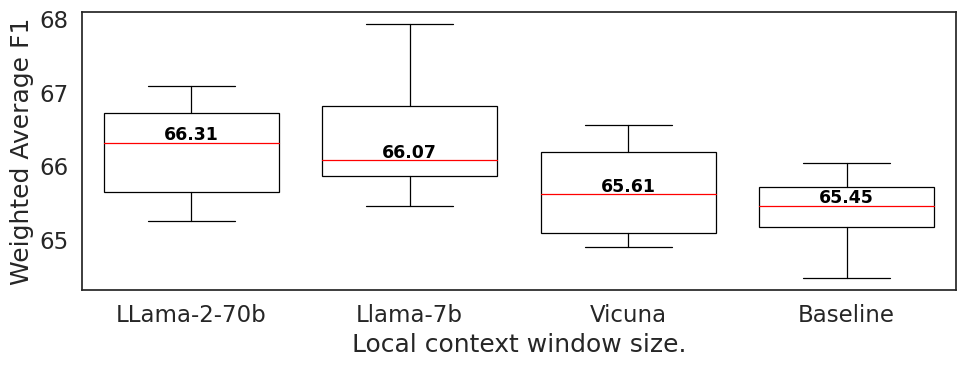

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot
import pandas as pd 

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
}


sns.set(font_scale=1.5)
sns.set_style("white")

fig, ax = pyplot.subplots(figsize=(10, 4))
 
selected_data = df


medians =  selected_data.groupby(['sent_aggregate_method'])['hp_metric'].median().round(2)
vertical_offset = selected_data['hp_metric'].median() * 0.003  # offset from median for display
medians = dict(medians)

ax = sns.boxplot(x="sent_aggregate_method", y="hp_metric", # hue="accumulate_grad_batches",
                 data=selected_data,  
                 ax=ax,
            showfliers=False,
            linewidth=0.9, 
            **PROPS)
ax.set_xlabel('Local context window size.')
ax.set_ylabel('Weighted Average F1')


for icol,  xtick in enumerate(ax.get_xticklabels()):
    ax.text(icol, medians[str(xtick._text)] + 0.04, medians[str(xtick._text)],
            horizontalalignment='center',size='x-small',color='black', weight='semibold')

plt.tight_layout()
plt.savefig('method_ablation_window.pdf')